In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table_cell;
    text-aligh: center;
    vertical-align: middle;
}
""")

In [3]:
import warnings

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

pd.options.display.max_rows = 100

In [4]:
data = pd.read_csv('train.csv', header=0)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


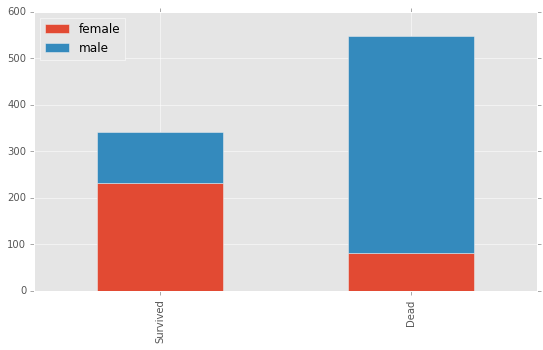

In [17]:
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(9,5))

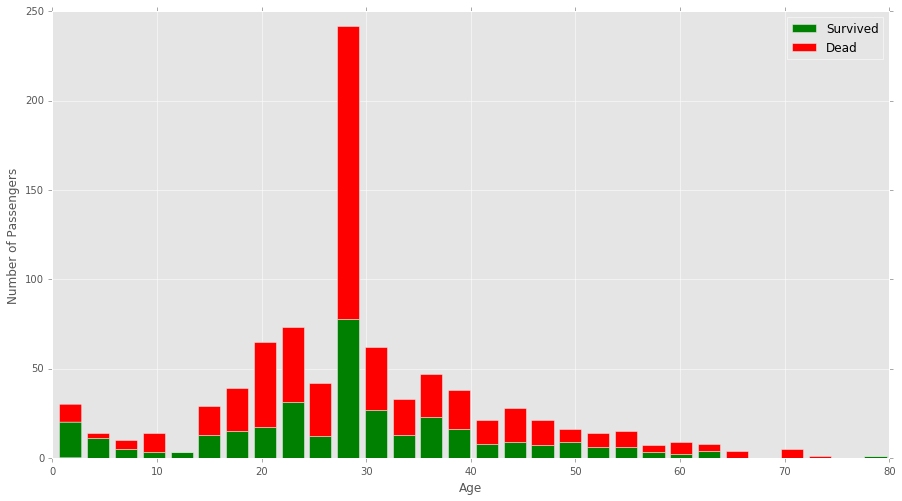

In [217]:
figure = plt.figure(figsize = (15,8))
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], stacked=True, color=['g','r'],bins=30,label=['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()

,bins,Percent_Survived
0,NaN,NaN


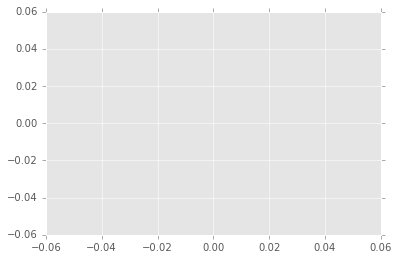

In [230]:
Survived = pd.Series([.65,.9,.5,.1,1,.5,.4,.3,.45,.3,.4,.45,.4,.5,.4,.4,.35,.35,.6,.5,.5,.5,.1,.5,0,0,0,0,0,.1])
no = pd.Series([x for x in range(30)])
df1 = pd.DataFrame([no + Survived], columns=['bins','Percent_Survived'])
plt.bar(df1.bins, df1.Percent_Survived)
df1

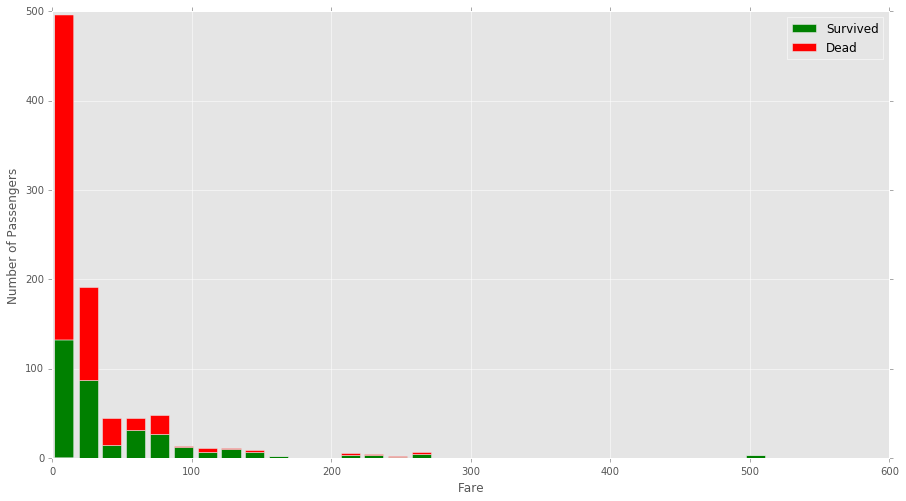

In [28]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']], stacked=True, color=['g','r'],
        bins = 30, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()

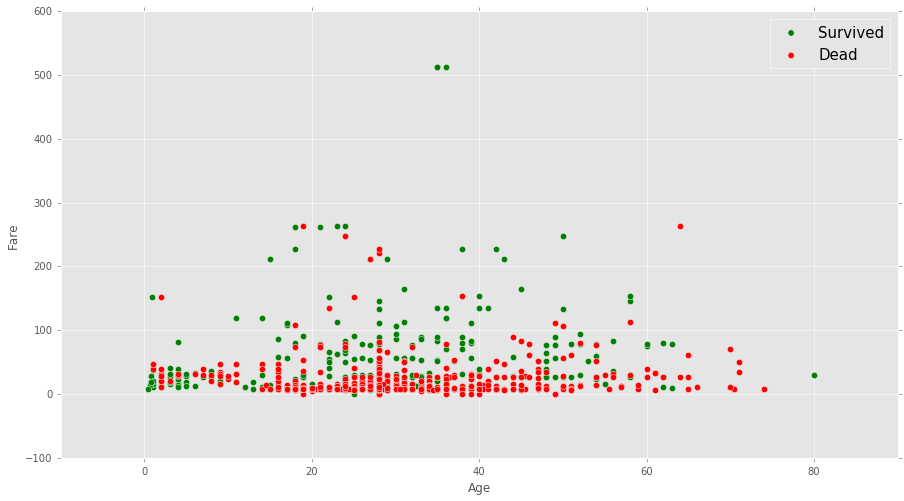

In [42]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red', s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('Survived','Dead'), scatterpoints = 1, loc='upper right', fontsize=15,)


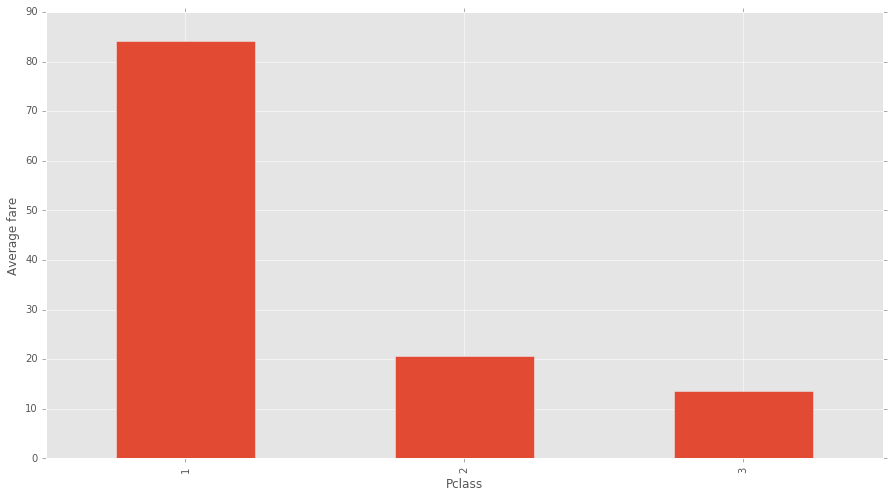

In [49]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(15,8), ax=ax)

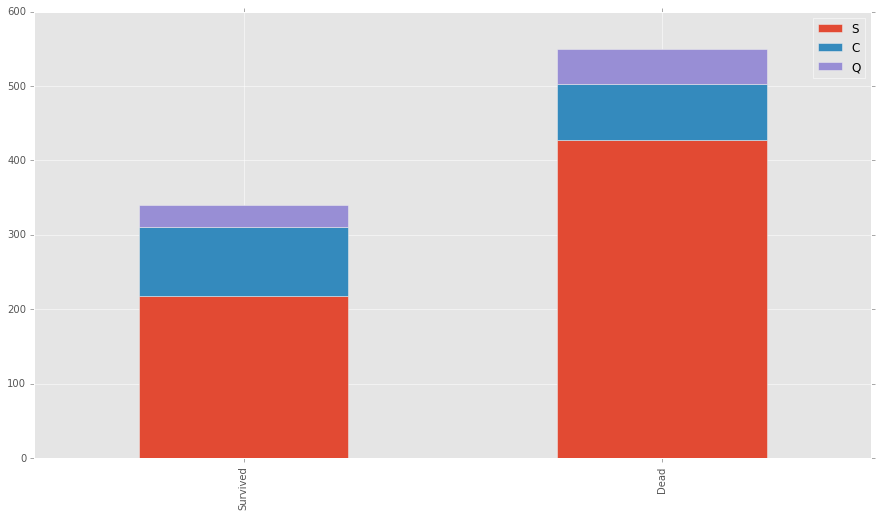

In [53]:
survived_embark = data[data['Survived']==1]['Embarked'].value_counts()
dead_embark = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark, dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

In [175]:
def status(feature):
    
    print 'Processing',feature,': ok'

In [176]:
def get_combined_data():
    
    train = pd.read_csv('train.csv', header=0)
    
    test = pd.read_csv('test.csv', header=0)
    
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True, axis=1)
    
    return combined

In [177]:
combined = get_combined_data()

In [178]:
combined.shape

(1309, 11)

In [179]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
def get_titles():
    
    global combined
    
    combined['Title'] = combined['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
    
    title_dictionary = {
                        'Capt':         'Officer',
                        'Col':          'Officer',
                        'Major':        'Officer',
                        'Jonkheer':     'Royalty',
                        'Don':          'Royalty',
                        'Sir':          'Royalty',
                        'Dr':           'Officer',
                        'the Countess': 'Royalty',
                        'Dona':         'Royalty',
                        'Mme':          'Mrs',
                        'Mlle':         'Miss',
                        'Ms':           'Mrs',
                        'Mr':           'Mr',
                        'Mrs':          'Mrs',
                        'Miss':         'Miss',
                        'Master':       'Master',
                        'Lady':         'Royalty'
                       }
    
    combined['Title'] = combined.Title.map(title_dictionary)

In [181]:
get_titles()

In [182]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [183]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1301 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [184]:
grouped = combined.groupby(['Sex','Pclass','Title'])
grouped.median()

PassengerId   Age  SibSp  Parch      Fare
Sex    Pclass Title                                             
female 1      Miss           529.5  30.0    0.0    0.0   99.9625
              Mrs            853.5  45.0    1.0    0.0   78.1125
              Officer        797.0  49.0    0.0    0.0   25.9292
              Royalty        760.0  39.0    0.0    0.0   86.5000
       2      Miss           606.5  20.0    0.0    0.0   20.2500
              Mrs            533.0  30.0    1.0    0.0   26.0000
       3      Miss           603.5  18.0    0.0    0.0    8.0500
              Mrs            668.5  31.0    1.0    1.0   15.5000
male   1      Master         803.0   6.0    1.0    2.0  134.5000
              Mr             634.0  41.5    0.0    0.0   47.1000
              Officer        678.0  52.0    0.0    0.0   37.5500
              Royalty        600.0  40.0    0.0    0.0   27.7208
       2      Master         550.0   2.0    1.0    1.0   26.0000
              Mr             723.5  30.0    0.0    0.0   13.0000
              Officer        358.5  38.5    0.0    0.0   12.2500
       3      Master         789.0   6.0    3.0    1.0   22.3583
              Mr             640.5  26.0    0.0    0.0    7.8958

In [185]:
combined["Age"] = combined.groupby(['Sex','Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))

In [186]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1301 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [187]:
def process_names():
    
    global combined
    combined.drop('Name', axis=1, inplace=True)
    
    titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    combined = pd.concat([combined, titles_dummies],axis=1)
    
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')

In [188]:
process_names()

Processing names : ok


In [189]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,0.0,0.0,1.0,0.0,0.0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,0.0,1.0,0.0,0.0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0


In [190]:
def process_fares():
    
    global combined
    
    combined.Fare.fillna(combined.Fare.mean(), inplace=True)
    
    status('fare')

In [191]:
process_fares()

Processing fare : ok


In [192]:
def process_cabin():
    
    global combined
    
    combined.Cabin.fillna('U',inplace=True)
    
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    
    combined = pd.concat([combined,cabin_dummies],axis=1)
    
    combined.drop('Cabin',axis=1,inplace=True)
    
    status('cabin')

In [193]:
process_cabin()

Processing cabin : ok


In [194]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 24 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Embarked         1307 non-null object
Title_Master     1309 non-null float64
Title_Miss       1309 non-null float64
Title_Mr         1309 non-null float64
Title_Mrs        1309 non-null float64
Title_Officer    1309 non-null float64
Title_Royalty    1309 non-null float64
Cabin_A          1309 non-null float64
Cabin_B          1309 non-null float64
Cabin_C          1309 non-null float64
Cabin_D          1309 non-null float64
Cabin_E          1309 non-null float64
Cabin_F          1309 non-null float64
Cabin_G          1309 non-null float64
Cabin_T          1309 non-null float64
Cabin_U

In [195]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,male,22.0,1,0,A/5 21171,7.2500,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,female,35.0,1,0,113803,53.1000,S,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3,male,35.0,0,0,373450,8.0500,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [196]:
def process_sex():
    
    global combined
    
    combined['Sex'] = combined['Sex'].map({'male':1,'female':0})
    
    status('sex')

In [197]:
process_sex()

Processing sex : ok


In [198]:
def process_pclass():
    
    global combined
    
    pclass_dummies = pd.get_dummies(combined.Pclass, prefix='Pclass')
    
    combined = pd.concat([combined,pclass_dummies],axis=1)
    
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('pclass')

In [199]:
process_pclass()

Processing pclass : ok


In [200]:
def process_ticket():
    
    global combined
    
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t: t.strip(), ticket)
        ticket = filter(lambda t: not t.isdigit(), ticket)
        if len(ticket) > 0:
            return ticket[0]
        else:
            return 'XXX'
        
    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies],axis=1)
    combined.drop('Ticket',inplace=True, axis=1)

    status('ticket')

In [201]:
process_ticket()

Processing ticket : ok


In [202]:
def process_family():
    
    global combined
    
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<=s else 0)
    
    status('Family')

In [203]:
process_family()

Processing Family : ok


In [204]:
combined.shape

(1309, 66)

In [205]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,1,0,7.2500,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,1,0
1,2,0,38.0,1,0,71.2833,C,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,1,0
2,3,0,26.0,0,0,7.9250,S,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0
3,4,0,35.0,1,0,53.1000,S,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0,1,0
4,5,1,35.0,0,0,8.0500,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0


In [206]:
def process_embarked():
    
    global combined
    
    combined.Embarked.fillna('S',inplace=True)
    
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)
    
    status('embarked')

In [207]:
process_embarked()

Processing embarked : ok


In [208]:
def scale_all_features():
    
    global combined
    
    features = list(combined.columns)
    features.remove('PassengerId')
    combined[features] = combined[features].apply(lambda x: x/x.max(), axis=0)
    
    print 'Features scaled successfully'

In [209]:
scale_all_features()

Features scaled successfully


In [210]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily,Embarked_C,Embarked_Q,Embarked_S
0,1,1.0,0.2750,0.125,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,1.0,0.0,0.0,0.0,1.0
1,2,0.0,0.4750,0.125,0.0,0.139136,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,1.0,0.0,1.0,0.0,0.0
2,3,0.0,0.3250,0.000,0.0,0.015469,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.090909,1.0,0.0,0.0,0.0,0.0,1.0
3,4,0.0,0.4375,0.125,0.0,0.103644,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.181818,0.0,1.0,0.0,0.0,0.0,1.0
4,5,1.0,0.4375,0.000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.090909,1.0,0.0,0.0,0.0,0.0,1.0


In [231]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

In [232]:
def compute_score(clf,X,y,scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [233]:
def recover_train_test_target():
    global combined
    
    train0 = pd.read_csv('train.csv', header=0)
    
    targets = train0.Survived
    train = combined.ix[0:890]
    test = combined.ix[891:]
    
    return train, test, targets

In [234]:
train, test, targets = recover_train_test_target()

In [235]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train, targets)

In [236]:
features = pd.DataFrame()

features['feature'] = train.columns
features['importance'] = clf.feature_importances_

In [237]:
features.sort(['importance'], ascending=False)

C:\Users\Director UYE\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,feature,importance
0,PassengerId,0.127896
2,Age,0.119486
8,Title_Mr,0.118721
5,Fare,0.113807
1,Sex,0.103938
7,Title_Miss,0.038366
9,Title_Mrs,0.036897
23,Pclass_3,0.036638
20,Cabin_U,0.028649
21,Pclass_1,0.021577


In [238]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
train_new.shape

(891L, 14L)

In [239]:
test_new = model.transform(test.astype(int))
test_new.shape

(418L, 14L)

In [241]:
forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                'max_depth' : [4,5,6,7,8],
                'n_estimators': [200,210,240,250],
                'criterion' : ['gini', 'entropy']
                }

cross_validation = StratifiedKFold(targets, n_folds=5)

grid_search = GridSearchCV(forest,
                          param_grid=parameter_grid,
                          cv=cross_validation)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.830527497194
Best parameters: {'n_estimators': 210, 'criterion': 'gini', 'max_depth': 4}


In [242]:
output = grid_search.predict(test_new).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('besbesoutput.csv', index=False)